## Screen time & Steps: Is There a Relationship?
### Macy Ryan's CPSC 222, Fall 2020 Data Science Project

### Part one: Introduction

In this project I will be looking at the realtionship between number of steps taken in a day & hours of screen time spent on my smart phone. 

#### The Domain

The domain I will be working with in this projects is both a fitness domain and a technology domain. These domains are important to me because I think they both directly affect my wellbeing. I am constantly surronded by technology and know it effects different areas of my life. Furthermore, although I consider myslef a fairly active person, I want to see just how many steps I get everyday. I am researching the correspondence between number of steps taken in a day with the number of hours I am on my phone. 

#### The Dataset

The data set that I will be using is one that I have manually put together over the past 2-3 months. While it began as just 3 attributes, Date, Steps, and Screen time, I since added Hours spent on Zoom and the day of the week, making it 5 total attributes.

In [19]:
import pandas as pd
import numpy as np

# to begin our dataset analysis we must import the code 
personal_data = pd.read_csv("personal_data.csv", header=0) # read data from the csv file, set header to 0
# personal_data = personal_data.set_index("Date") # set the index to the Date attribute
print(personal_data) # print out the raw data

        Date  Steps  Screen Time (on phone) (hrs) Day of the week  \
0    9/18/20   4260                          5.00          Friday   
1    9/19/20  10120                          5.00        Saturday   
2    9/20/20   2901                          4.00          Sunday   
3    9/21/20  11984                          3.50          Monday   
4    9/22/20   1113                          4.00         Tuesday   
..       ...    ...                           ...             ...   
84  12/11/20    456                          5.00          Friday   
85  12/12/20    182                          1.15        Saturday   
86  12/13/20    105                          0.95          Sunday   
87  12/14/20   1060                          1.66          Monday   
88  12/15/20   2639                          1.00         Tuesday   

    Time Spent in Class (hrs)  
0                         3.0  
1                         0.0  
2                         0.0  
3                         3.0  
4          

#### Hypothesis 

My hypothesis is that the number of steps I take per day will have a negative correlation to the number of hours spent on my phone; meaning as the number of steps increases the number of hours will decrease and vise versa. 

#### Classification Task 

Using the various attributes I am going to try to classify the number of step I would take on a given day. I belive that the prediction would depend heavily on the day of the week and the sceen time. I anicipate it being challanging to use the day of the week in this classification because it is not numerical.

#### Findings

I do not have any findings yet.

### Part two: Data Analysis

#### Details about the dataset 

The dataset I used in this project was manually compiled over 3 months. Using tracking functions on my phone I was able to know my steps per day and the screentime spent on my smartphone. In a csv file I then entered the date, day of the week, and number of hours in a class. 

#### Data Prep 

Because I manually entered the data into the table, there is no data prep or cleaning that needs to done. 

#### Exploratory Data Analysis

In order to explore this data and my hypothesis I am going to conduct a few different data aggregation techniques and also plot the data to visualize any correlations. In the following code cells I will explore the data and explain my findings along the way.  

The first thing I was to do is print a line chart of steps and screentime with date on the x-axis.

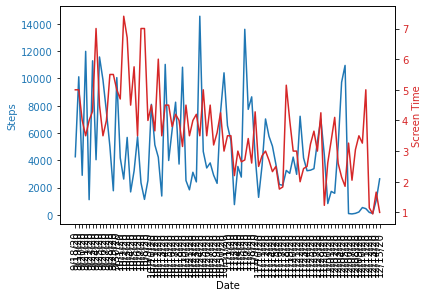

In [20]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots() 

'''
Here I am plotting the data on a line chart using two seperate y-axis
on one axis will be Steps, on the other Screentime, and the X-axis remains 
constant with Date.  
'''
color = 'tab:blue' # set color 
x = personal_data["Date"] # x-axis has date
y1 = personal_data["Steps"] # y-axis 1 has steps
y2 = personal_data["Screen Time (on phone) (hrs)"] # y-axis 2 has screentime
ax1.plot(x, y1) # plot the x an y axis
ax1.set_xlabel("Date") # set label
ax1.set_ylabel("Steps", color=color) # set label and color 
ax1.tick_params(axis='y', labelcolor=color) # set label color
ax1.tick_params(axis='x', rotation=90) # rotate the label on the x-axis

ax2 = ax1.twinx() # create a second chart that mirrors the first 

color = 'tab:red' # set color 
ax2.plot(x, y2, color=color) # plot the screen time 
ax2.set_ylabel("Screen Time", color=color) # set the label and color 
ax2.tick_params(axis='y', labelcolor=color) # set color

plt.show() # show the plot 

#### Line Graph Analysis

Looking at this line graph we can begin to see the corrilation between screen-time and number of steps taken each day. When the number of steps spikes we see the screen time dip and vise-versa. Using this we can assume that the number of hours spent looking at screen do impact the number of steps I took each day. However, this is not enough to fully come to that conclusion. My next step is looking at a few more charts and more testing. 

Now I want to use a bar chart to find on which days of the week I had the most screen time and which days of the week I had the most steps. 

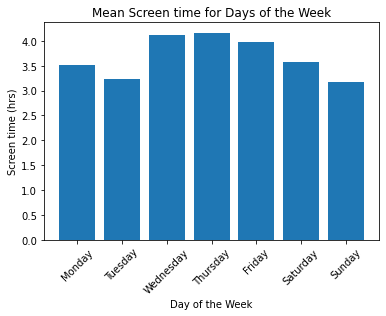

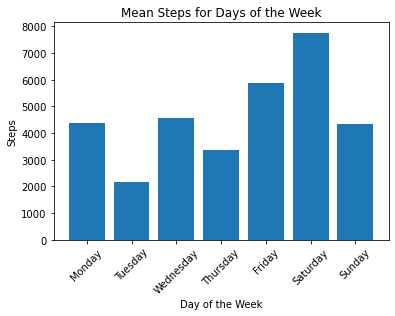

In [21]:
grouped_by_days = personal_data.groupby("Day of the week") # group the data by day of the week 
for group_name, group_df in grouped_by_days:
    if(group_name == "Monday"): # if the group name is Monday 
        mon_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Mondays 
        mon_steps_ser = group_df["Steps"] # create a series of Steps on Mondays
    elif(group_name == "Tuesday"): 
        tue_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Tuesdays
        tue_steps_ser = group_df["Steps"] # create a series of Steps on Tuesdays
    elif(group_name == "Wednesday"): 
        wed_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Wednesdays
        wed_steps_ser = group_df["Steps"] # create a series of Steps on Wednesdays
    elif(group_name == "Thursday"): 
        thu_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Thursdays
        thu_steps_ser = group_df["Steps"] # create a series of Steps on Thursdays
    elif(group_name == "Friday"): 
        fri_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Fridays
        fri_steps_ser = group_df["Steps"] # create a series of Steps on Fridays
    elif(group_name == "Saturday"): 
        sat_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Saturdays
        sat_steps_ser = group_df["Steps"] # create a series of Steps on Saturdays
    elif(group_name == "Sunday"): 
        sun_st_ser = group_df["Screen Time (on phone) (hrs)"] # create a series of Screen time on Sundays
        sun_steps_ser = group_df["Steps"] # create a series of Steps on Sundays

# create a series of the weeks mean screentimes 
weekly_st_avg = [mon_st_ser.mean(), tue_st_ser.mean(), wed_st_ser.mean(), thu_st_ser.mean(), fri_st_ser.mean(), sat_st_ser.mean(), sun_st_ser.mean()]
# create a series with the weeks mean steps 
weekly_step_avg = [mon_steps_ser.mean(), tue_steps_ser.mean(), wed_steps_ser.mean(), thu_steps_ser.mean(), fri_steps_ser.mean(), sat_steps_ser.mean(), sun_steps_ser.mean()]
# create a series with the days of the week 
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

plt.figure() # clear the last plot 
plt.bar(week_days, weekly_st_avg) # on a bar chart plot the days of the week & weekly screentime avg
plt.xlabel("Day of the Week") # label the x-axis
plt.ylabel("Screen time (hrs)") # label the y-axis 
plt.title("Mean Screen time for Days of the Week") # title the chart 
plt.tick_params(axis='x', rotation=45) # rotate the x-axis labels
plt.show() # show the chart 

plt.figure() # clear the previous chart 
plt.bar(week_days, weekly_step_avg) # plot the days of the week vs. weekly step avg
plt.xlabel("Day of the Week") # label the x-axis
plt.ylabel("Steps") # label the y-axis 
plt.title("Mean Steps for Days of the Week") # title the chart 
plt.tick_params(axis='x', rotation=45) # rotate the x-axis labels 
plt.show() # show the chart 

#### Bar Graph Analysis

It is clear that on certain days I spend dramatically less time walking and some days I spend more time walking. Take Tuesday and Saturday, on Tuesday, on average, I spend between 3 and 3.5 hours on my phone and walked, on average, only 2000 steps a day. However on Saturdays, I averaged above 8000 steps and spents 4 hours on my phone, on average. Given this data it could be argued that there isn't much corrilation between steps and screen time. 

#### Hypothesis Testing 

The only thing we can truly conclude from the previous graphs is that they are not an adequate measure for testing whether or not there is a corrilation between steps and screen time. In order to really test whether or not there is a relationship between the two we need to conduct some hypothesis testing

I want to test whether the mean screen time on days I walked more than 4000 steps is less than the mean screen time on days I walk less than 4000 steps. 

In [39]:
'''Here I am going to make a series of the screen time on days where 
I take more than 4000 steps per day and another series for when I take
less than 4000 steps a day. Using these series I will be able to test whether
the mean screen time is higher on days I walk less.'''
steps_on_4000_plus = personal_data.loc[personal_data['Steps'] >= 4000] # Seperate the data by numer of steps
st_on_4000_plus = steps_on_4000_plus["Screen Time (on phone) (hrs)"] # create series of screen time
steps_on_4000_less = personal_data.loc[personal_data['Steps'] < 4000] # Seperate the data by numer of steps
st_on_4000_less = steps_on_4000_less["Screen Time (on phone) (hrs)"] # create series of screen time

##### Select the Null and Alternative Hypothesis

$$H_0: \mu_1 > \mu_2$$

$$H_1: \mu_1 \leq \mu_2$$  

*1: Screen time on days with more than 4000 steps*  
*2: Screen time on days with less than 4000 steps*

We will reject $H_0$ if the mean screen time on days with 4000+ steps is less than the mean screen time on days with 4000- steps. 